# Linear Models
Linear models are already used for hundred of years. It is a class of linear functions of continuous-valued inputs.

## Linear Learner
### Overview

Linear Learner is a model that assumes a linear relationship between the input variables x and the single output variable y. More specifically, that y can be calculated from a linear combination of the input variables x. Linear learner is a quite simple model as the representation of this model is a linear equation.  

The linear equation assigns one scaler factor to each input value or column, called a coefficients or weights. One additional coefficient is also added, giving additional degree of freedom and is often called the intercept or the bias coefficient.   
For example :  y = ax1 + bx2 + c .  

### Implementation

Below mentioned is the implementation of Linear Learner.

In [ ]:
psource(LinearLearner)

This algorithm first assigns some random weights to the input variables and then based on the error calculated updates the weight for each variable. Finally the prediction is made with the updated weights.  

### Example

We will now use the Linear Learner to classify a sample with values: 5.1, 3.0, 1.1, 0.1.

In [3]:
import os, sys
sys.path = [os.path.abspath("../../")] + sys.path
from learning4e import *
from notebook4e import *
from utils4e import *

One of the key point when applying a dataset to the linear learner is to convert the class names to numbers before feeding it into the learner:

In [4]:
iris = DataSet(name="iris")
iris.classes_to_numbers()

linear_learner = LinearLearner(iris)
print(linear_learner([5, 3, 1, 0.1]))

0.0863712261312969


The result is closer to 0 than 1 and 2, thus we can class it as class 0 which represents 'setosa'.

## Logistic Linear Learner

Logistic linear learner is different from common linear learner only in the updating rule of weights. Logistic function is continuous and derivable. Using `LogisticLinearLearner` is similar to using `LinearLearner`:

In [8]:
logistic_learner = LogisticLinearLeaner(iris)
print(logistic_learner([5, 3, 1, 0.1]))

0.16279158793332174


The prediction can also be treated as class 0.

# Nonparametric Models

A nonparametric model is one that cannot be characterized by a bounded set of parameters. This usually happens when the dataset is huge and let the data speak for their own property is ensenstially good. The simplest approach is to put all examples into a lookup table. 

Here we will demonstrate a improved version of lookup table: k-nearest neighbors lookup, which finds the k examples that are nearest to the given query.

## K-NEAREST NEIGHBOURS CLASSIFIER

### Overview

In this section we are going to use this to classify Iris flowers. More about kNN on [Scholarpedia](http://www.scholarpedia.org/article/K-nearest_neighbor).

![kNN plot](images/knn_plot.png)

Let's see how kNN works with a simple plot shown in the above picture.

We have co-ordinates (we call them **features** in Machine Learning) of this red star and we need to predict its class using the kNN algorithm. In this algorithm, the value of **k** is arbitrary. **k** is one of the **hyper parameters** for kNN algorithm. We choose this number based on our dataset and choosing a particular number is known as **hyper parameter tuning/optimising**. We learn more about this in coming topics.

Let's put **k = 3**. It means you need to find 3-Nearest Neighbors of this red star and classify this new point into the majority class. Observe that smaller circle which contains three points other than **test point** (red star). As there are two violet points, which form the majority, we predict the class of red star as **violet- Class B**.

Similarly if we put **k = 5**, you can observe that there are three yellow points, which form the majority. So, we classify our test point as **yellow- Class A**.

In practical tasks, we iterate through a bunch of values for k (like [1, 3, 5, 10, 20, 50, 100]), see how it performs and select the best one. 

### Implementation

Below follows the implementation of the kNN algorithm:

In [ ]:
psource(NearestNeighborLearner)

It takes as input a dataset and k (default value is 1) and it returns a function, which we can later use to classify a new item.

To accomplish that, the function uses a heap-queue, where the items of the dataset are sorted according to their distance from *example* (the item to classify). We then take the k smallest elements from the heap-queue and we find the majority class. We classify the item to this class.

### Example

We measured a new flower with the following values: 5.1, 3.0, 1.1, 0.1. We want to classify that item/flower in a class. To do that, we write the following:

In [16]:
iris = DataSet(name="iris")

knn_model = NearestNeighborLearner(iris,k=3)
print(knn_model([5.1,3.0,1.1,0.1]))


setosa


In [20]:
err_ratio(knn_model, iris)

0.06000000000000005

Which is the same as expected. By altering k, you can change the number of neighbors considering in the lookup procedure. Thus the classification accuracy is directly affected by k.

In order to show the influence of k, we need to fake some data that easier for visualization first. We will use only two dimensions among the attributes of iris dataset.

First, we load the dataset and compose a new dataset with the first two among all the attributes together with the target dimension.

In [15]:
iris = DataSet(name="iris")
iris.classes_to_numbers()
examples = np.asarray(iris.examples)
reduced_iris = DataSet(examples=examples[:,[0,1,4]].tolist(), distance=euclidean_distance)

Then we build models with different k and plot the model's decision boundaries with util function `plot_model_boundary`.

Let's try with k=1 and assign the first attribute to x-axis and the second to y-axis.

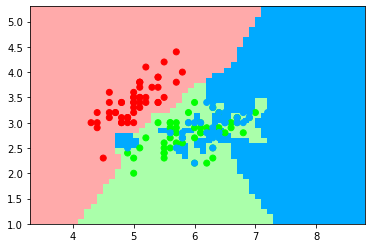

In [16]:
model = NearestNeighborLearner(reduced_iris, k=1)
plot_model_boundary(reduced_iris,0,1, model=model)

We can see there are zigzag and rectangle shapes. The class of a point heavily relies on the nearest point type.

Then we increase k to 3:

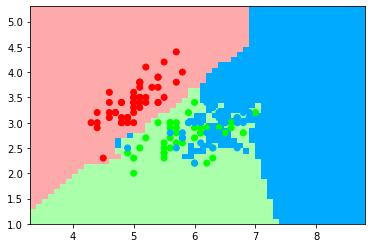

In [17]:
model = NearestNeighborLearner(reduced_iris, k=3)
plot_model_boundary(reduced_iris,0,1, model=model)

When k=3 we can see there are some areas near blue points are classified as green and the shape of each color chunk is no longer shuttered.

Then we set k=5.

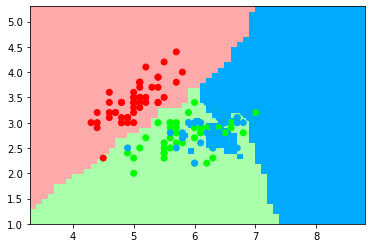

In [19]:
model = NearestNeighborLearner(reduced_iris, k=5)
plot_model_boundary(reduced_iris,0,1, model=model)

The class boundary seems more regular. Then let's double k, making k =14:

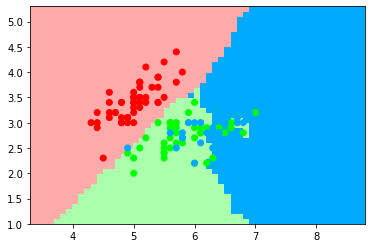

In [27]:
model = NearestNeighborLearner(reduced_iris, k=14)
plot_model_boundary(reduced_iris,0,1, model=model)

The decision boundary is smoother with larger k generally.